### Иерархический кластерный анализ

In [537]:
#   активируем библиотеки

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn')

#  Еще одна графическая библиотека
import seaborn as sns

#  Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [538]:
import os

In [539]:
os.chdir("C:/Users/Соня/OneDrive/Рабочий стол/jupyter/analis_python/lab_1_3/задача_1_леденцы")

In [540]:
df = pd.read_csv('Леденцы.dat', sep=";", header = 0, index_col=False)

**Предобработка данных**

In [541]:
# проверяем тип данных и пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      338 non-null    int64
 1   V2      338 non-null    int64
 2   V3      338 non-null    int64
 3   V4      338 non-null    int64
 4   V5      338 non-null    int64
 5   V6      338 non-null    int64
 6   V7      338 non-null    int64
 7   V8      338 non-null    int64
 8   V9      338 non-null    int64
 9   V10     338 non-null    int64
 10  V11     338 non-null    int64
dtypes: int64(11)
memory usage: 29.2 KB


In [542]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


In [543]:
#смотрим нет ли некорректных оценок
print(df.min())
print(df.max())

V1     2
V2     2
V3     2
V4     2
V5     2
V6     2
V7     2
V8     2
V9     2
V10    2
V11    2
dtype: int64
V1     5
V2     5
V3     5
V4     5
V5     5
V6     5
V7     5
V8     5
V9     5
V10    5
V11    5
dtype: int64


**Так как данные однородные, без пропусков с одинаковым диапазоном значений, то делать с ними ничего не нужно**

In [544]:
df1 = df #сохраним без изменений

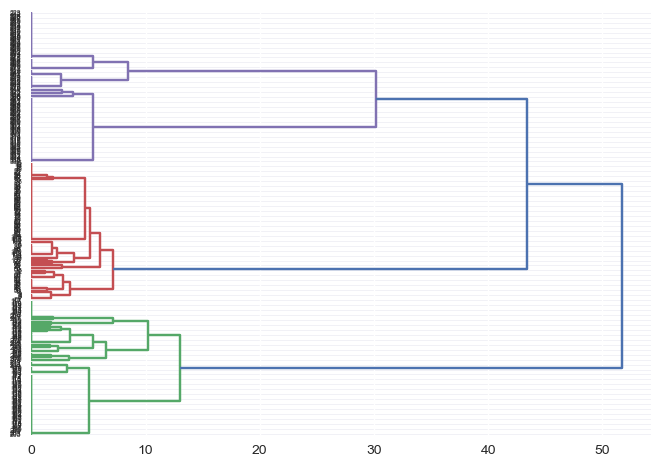

In [545]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

link = linkage(df1, "ward", "euclidean") #Выполнить иерархическую кластеризацию
dn = dendrogram(link, orientation = "right")

**Судя по дендрограмме у нас скорее всего 4 кластера. Также можно рассмтреть 3 и 5 кластеров, если не получится проинтерпретировать результаты для 4 кластеров.**

Разобьем на 4 кластера

In [546]:
df1["cluster"] = fcluster(link, 4, criterion='maxclust')

Вычислим среднее значение

In [547]:
round(df1.groupby("cluster").mean(), 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.8,2.8,2.8,2.6,2.6,2.6,2.8,2.9,5.0,4.8,4.9
2,4.8,4.8,4.8,4.7,3.0,3.0,3.0,3.0,3.1,3.0,3.0
3,3.0,3.0,3.0,2.9,2.9,2.9,4.9,4.9,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,4.9,4.9,3.0,2.9,2.8,2.8,2.8


In [548]:
df1.groupby("cluster").size()

cluster
1    108
2    110
3     59
4     61
dtype: int64

Результат можно проинтерпретировать следующим образом:
    В первой группе респонденты употребляют леденцы только в качестве лечения. 
    Во второй группе основная цель употребления леденцов - очистить полость рта от неприятного вкуса или запаха
    В третьей группе респонденты употребляют леденцы в качестве сладостей
    В четвертой группе респонденты в основном употребляют леденцы чтобы сосредоточиться.

#### Уменьшим размерность

Нарисуем тепловую карту, чтобы лучше понимать как корелируют данные

<AxesSubplot:>

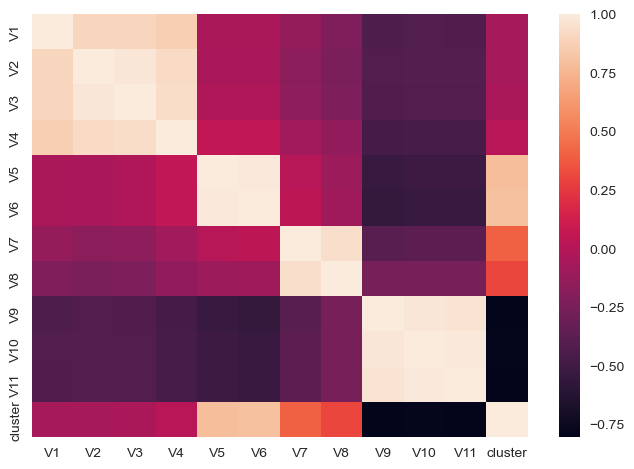

In [549]:
sns.heatmap(df.corr())

In [550]:
correlated_features = df1[['V1', 'V2', 'V3', 'V4']] #Линейное снижение размерности. Входные данные центрируются
pca = PCA()
principal_components = pca.fit_transform(correlated_features)
df1['1234'] = principal_components[:, 0]

In [551]:
correlated_features = df1[['V5', 'V6']]
pca = PCA()
principal_components = pca.fit_transform(correlated_features)
df1['56'] = principal_components[:, 0]

In [552]:
correlated_features = df1[['V7', 'V8']]
pca = PCA()
principal_components = pca.fit_transform(correlated_features)
df1['78'] = principal_components[:, 0]

In [553]:
correlated_features = df1[['V9', 'V10', 'V11']]
pca = PCA()
principal_components = pca.fit_transform(correlated_features)
df1['91011'] = principal_components[:, 0]

In [554]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster,1234,56,78,91011
0,4,5,5,5,3,3,3,3,3,3,3,2,2.521511,-0.290789,-0.384536,0.992899
1,5,4,5,5,3,3,3,3,3,3,3,2,2.502625,-0.290789,-0.384536,0.992899
2,5,5,4,5,3,3,3,3,3,3,3,2,2.482812,-0.290789,-0.384536,0.992899
3,5,4,5,5,3,3,3,3,3,3,3,2,2.502625,-0.290789,-0.384536,0.992899
4,4,5,5,5,3,3,3,3,3,3,3,2,2.521511,-0.290789,-0.384536,0.992899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3,3,-0.998352,-0.290789,2.443602,0.992899
334,3,3,3,3,3,3,5,5,3,3,3,3,-0.998352,-0.290789,2.443602,0.992899
335,3,3,3,3,3,3,5,5,3,3,3,3,-0.998352,-0.290789,2.443602,0.992899
336,3,3,3,3,3,3,5,5,3,3,3,3,-0.998352,-0.290789,2.443602,0.992899


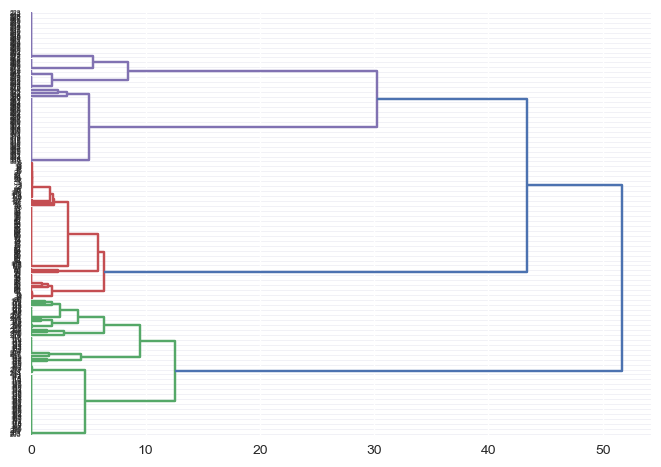

In [555]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


link = linkage(df1[['1234', '56', '78', '91011']], "ward", "euclidean")
dn = dendrogram(link, orientation = "right")

In [556]:
df1["cluster"] = fcluster(link, 4, criterion='maxclust')

In [557]:
round(df1[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'cluster']].groupby("cluster").mean(), 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.8,2.8,2.8,2.6,2.6,2.6,2.8,2.9,5.0,4.8,4.9
2,4.8,4.8,4.8,4.7,3.0,3.0,3.0,3.0,3.1,3.0,3.0
3,3.0,3.0,3.0,2.9,2.9,2.9,4.9,4.9,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,4.9,4.9,3.0,2.9,2.8,2.8,2.8


Видим, что результат совпадает с раннее увиденным.

### Кластерный анализ методом к-средних (k-means)

In [558]:
df2 = pd.read_csv('Леденцы.dat', sep=";", header = 0, index_col=False)

In [559]:
from sklearn.cluster import KMeans

Посмотрим какое количество кластеров лучше

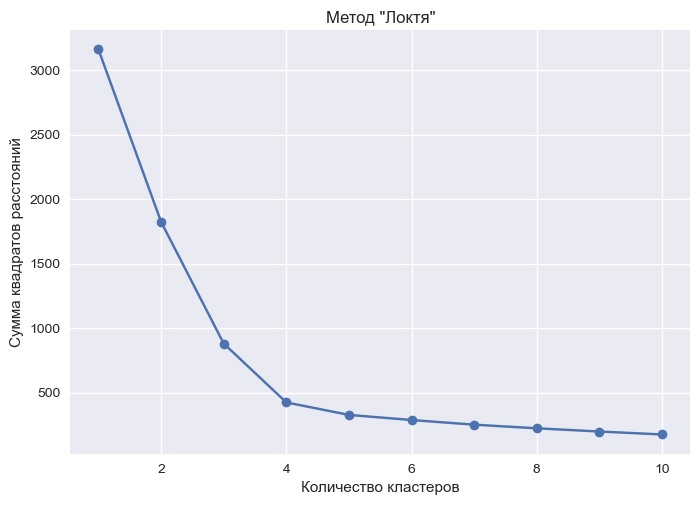

In [560]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Метод "Локтя"')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

Видно, что оптимальная точка - 4

In [561]:
model = KMeans(n_clusters=4)
transformed = model.fit(df2)
df2['Kmean'] = model.labels_
df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,Kmean
0,4,5,5,5,3,3,3,3,3,3,3,2
1,5,4,5,5,3,3,3,3,3,3,3,2
2,5,5,4,5,3,3,3,3,3,3,3,2
3,5,4,5,5,3,3,3,3,3,3,3,2
4,4,5,5,5,3,3,3,3,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3,3
334,3,3,3,3,3,3,5,5,3,3,3,3
335,3,3,3,3,3,3,5,5,3,3,3,3
336,3,3,3,3,3,3,5,5,3,3,3,3


In [562]:
round(df2.groupby('Kmean').mean(), 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
Kmean,,,,,,,,,,,
0,2.8,2.8,2.8,2.6,2.6,2.6,2.8,2.9,5.0,4.8,4.9
1,3.0,3.0,3.0,3.0,4.9,4.9,3.0,2.9,2.8,2.8,2.8
2,4.8,4.8,4.8,4.7,3.0,3.0,3.0,3.0,3.1,3.0,3.0
3,3.0,3.0,3.0,2.9,2.9,2.9,4.9,4.9,3.0,3.0,3.0


In [563]:
df2.groupby('Kmean').size()

Kmean
0    108
1     61
2    110
3     59
dtype: int64

Вывод: получили тот же результат, что и выше

### Кластерный анализ методом DBSCAN

In [564]:
#импортируем необходимые библиотеки
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [565]:
M = pd.read_csv('Леденцы.dat', sep=";", header = 0, index_col=False)

Обработаем предварительно данные

In [566]:
scalerFD = StandardScaler() #Стандартизирует признаки, вычитая среднее значение и масштабируя дисперсию до единицы.
M_scaled = scalerFD.fit_transform(M) 
M_normalized = normalize(M_scaled) # Чтобы убедиться, что данные будут соответствовать распределению гаусса,нормализуем
M_normalized = pd.DataFrame(M_normalized) 

In [567]:
pcaFD = PCA(n_components = 2) #уменьшим масштаб с помощью метода главных компонент
M_principal = pcaFD.fit_transform(M_normalized)  
M_principal = pd.DataFrame(M_principal) 
M_principal.columns = ['C1', 'C2'] 
print(M_principal.head()) 
len(M_principal)

         C1        C2
0 -0.844884 -0.356503
1 -0.850846 -0.353719
2 -0.847564 -0.357714
3 -0.850846 -0.353719
4 -0.844884 -0.356503


338

In [568]:
db_default = DBSCAN(eps = 0.4, min_samples = 40, metric='euclidean').fit(M_principal) 
labeling = db_default.labels_

In [569]:
print(min(labeling), max(labeling))

0 2


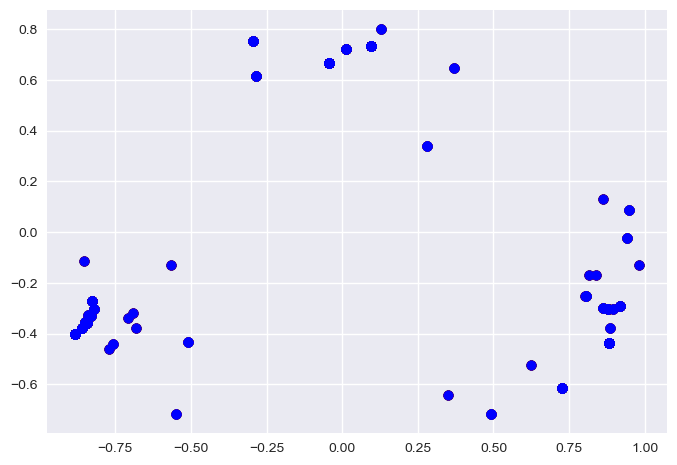

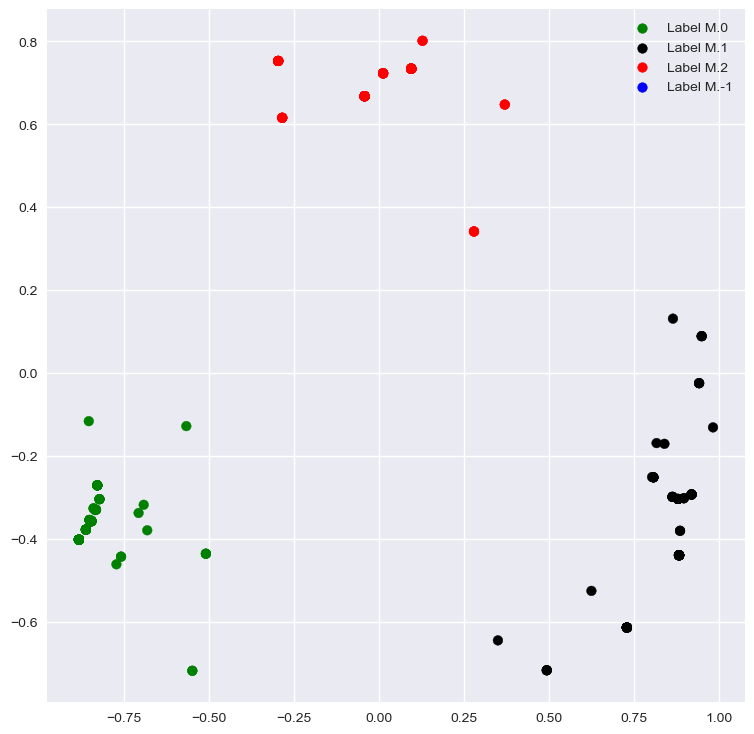

In [570]:
# Visualization of clustering model by giving different colours 
colours = {} 
# First colour in visualization is green 
colours[0] = 'g' 
# Second colour in visualization is black 
colours[1] = 'k' 
# Third colour in visualization is red 
colours[2] = 'r' 
# Last colour in visualization is blue 
colours[-1] = 'b' 
# Creating a colour vector for each data point in the dataset cluster 
cvec = [colours[label] for label in labeling] 
# Construction of the legend 
# Scattering of green colour 
g = plt.scatter(M_principal['C1'], M_principal['C2'], color ='g'); 
# Scattering of black colour 
k = plt.scatter(M_principal['C1'], M_principal['C2'], color ='k'); 
# Scattering of red colour 
r = plt.scatter(M_principal['C1'], M_principal['C2'], color ='r'); 
# Scattering of green colour 
b = plt.scatter(M_principal['C1'], M_principal['C2'], color ='b');  
# Plotting C1 column on the X-Axis and C2 on the Y-Axis 
# Fitting the size of the figure with figure function 
plt.figure(figsize =(9, 9)) 
# Scattering the data points in the Visualization graph 
plt.scatter(M_principal['C1'], M_principal['C2'], c = cvec) 
# Building the legend with the coloured data points and labelled 
plt.legend((g, k, r, b),('Label M.0', 'Label M.1', 'Label M.2', 'Label M.-1')) 
# Showing Visualization in the output 
plt.show() 

In [571]:
M['DBSCAN_gr'] = labeling

In [572]:
round(M.groupby("DBSCAN_gr").mean(), 1)
#round(M.groupby("DBSCAN_gr").min(), 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
DBSCAN_gr,,,,,,,,,,,
0,4.8,4.8,4.8,4.7,3.0,3.0,3.0,3.0,3.1,3.0,3.0
1,2.8,2.8,2.8,2.6,2.6,2.6,2.8,2.9,5.0,4.8,4.9
2,3.0,3.0,3.0,3.0,3.9,3.9,3.9,3.9,2.9,2.9,2.9


Рассмотрим другое количество кластеров

In [573]:
db_default = DBSCAN(eps = 0.2, min_samples = 40, metric='euclidean').fit(M_principal) 
labeling = db_default.labels_
print(min(labeling), max(labeling))

-1 2


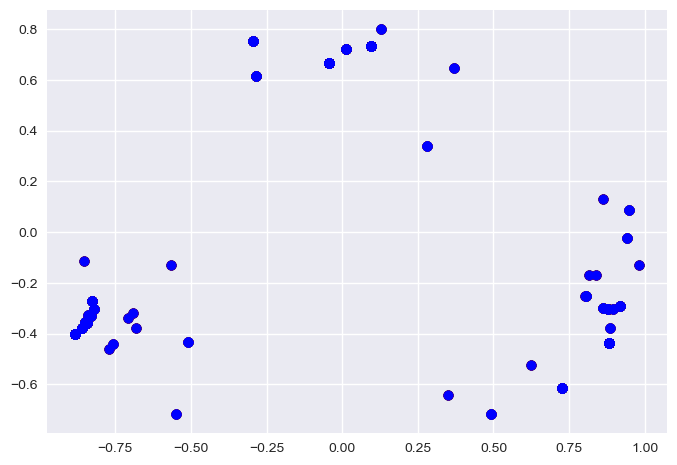

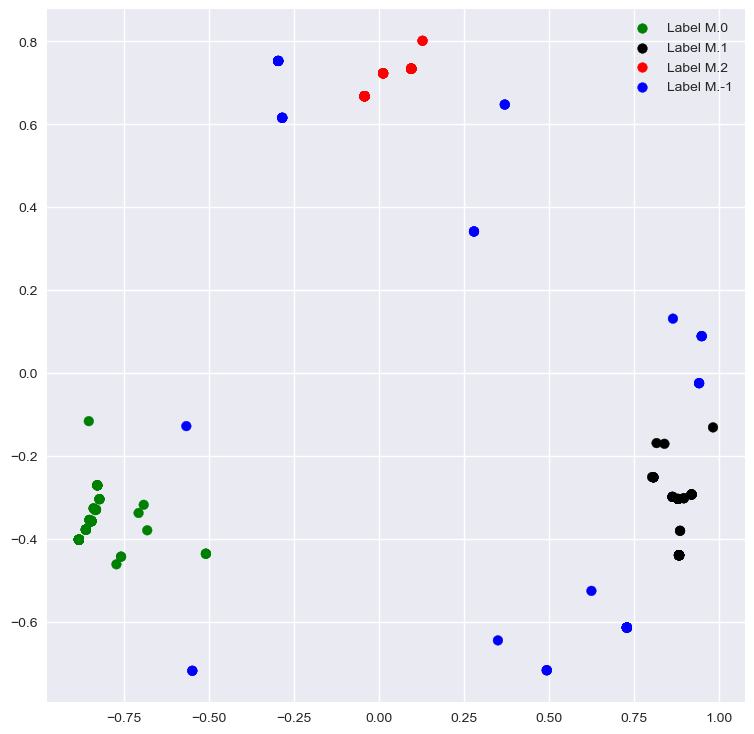

In [574]:
# Visualization of clustering model by giving different colours 
colours = {} 
# First colour in visualization is green 
colours[0] = 'g' 
# Second colour in visualization is black 
colours[1] = 'k' 
# Third colour in visualization is red 
colours[2] = 'r' 
# Last colour in visualization is blue 
colours[-1] = 'b' 
# Creating a colour vector for each data point in the dataset cluster 
cvec = [colours[label] for label in labeling] 
# Construction of the legend 
# Scattering of green colour 
g = plt.scatter(M_principal['C1'], M_principal['C2'], color ='g'); 
# Scattering of black colour 
k = plt.scatter(M_principal['C1'], M_principal['C2'], color ='k'); 
# Scattering of red colour 
r = plt.scatter(M_principal['C1'], M_principal['C2'], color ='r'); 
# Scattering of green colour 
b = plt.scatter(M_principal['C1'], M_principal['C2'], color ='b');  
# Plotting C1 column on the X-Axis and C2 on the Y-Axis 
# Fitting the size of the figure with figure function 
plt.figure(figsize =(9, 9)) 
# Scattering the data points in the Visualization graph 
plt.scatter(M_principal['C1'], M_principal['C2'], c = cvec) 
# Building the legend with the coloured data points and labelled 
plt.legend((g, k, r, b),('Label M.0', 'Label M.1', 'Label M.2', 'Label M.-1')) 
# Showing Visualization in the output 
plt.show() 

In [575]:
M['DBSCAN_gr'] = labeling

In [583]:
round(M.groupby("DBSCAN_gr").mean(), 1)
round(M.groupby("DBSCAN_gr").min(), 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
DBSCAN_gr,,,,,,,,,,,
-1,2,2,2,2,2,2,2,2,2,2,2
0,4,4,4,4,3,3,3,2,3,3,3
1,2,2,2,2,2,2,2,3,4,4,4
2,3,3,3,3,3,3,3,3,3,3,3


Рассмотрим другое количество данных

In [577]:
df3 = df1[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']]

In [578]:
db_default = DBSCAN(eps = 0.01, min_samples = 40, metric='euclidean').fit(df3) 
labeling = db_default.labels_
print(min(labeling), max(labeling))

-1 2


In [579]:
df3['DBSCAN_gr'] = labeling
round(df3.groupby("DBSCAN_gr").mean(), 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
DBSCAN_gr,,,,,,,,,,,
-1,3.5,3.4,3.4,3.2,3.4,3.4,2.9,3.0,3.6,3.5,3.5
0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0
2,3.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,3.0,3.0,3.0


In [580]:
db_default = DBSCAN(eps = 0.1, min_samples = 30, metric='euclidean').fit(df3) 
labeling = db_default.labels_
print(min(labeling), max(labeling))

-1 3


In [581]:
df3['DBSCAN_gr'] = labeling
print(round(df3.groupby("DBSCAN_gr").median(), 1))
round(df3.groupby("DBSCAN_gr").mean(), 1)
round(df3.groupby("DBSCAN_gr").min(), 1)

            V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11
DBSCAN_gr                                                       
-1         3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 0         5.0  5.0  5.0  5.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 1         3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  5.0  5.0  5.0
 2         3.0  3.0  3.0  3.0  5.0  5.0  3.0  3.0  3.0  3.0  3.0
 3         3.0  3.0  3.0  3.0  3.0  3.0  5.0  5.0  3.0  3.0  3.0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
DBSCAN_gr,,,,,,,,,,,
-1,2,2,2,2,2,2,2,2,2,2,2
0,5,5,5,5,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,5,5,5
2,3,3,3,3,5,5,3,3,3,3,3
3,3,3,3,3,3,3,5,5,3,3,3


Результат можно проинтерпретировать следующим образом: Респонденты разделились как в предыдущих анализах, но к ним добавились люди, которые в оценках которых была хоть одна двойка.

Вывод: Разные методы кластеризации выдают разные результаты. Их можно интерпретировать по-разному в зависимости от наших целей.